http://mlg.eng.cam.ac.uk/teaching/4f13/1920/bayesian%20finite%20regression.pdf (Last slide)
http://mlg.eng.cam.ac.uk/teaching/4f13/1920/marginal%20likelihood.pdf

In [4]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', size=14)

### Pseudo-random data (degree 3 polynomial)

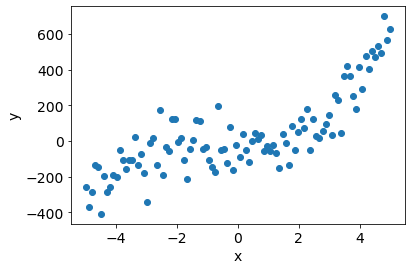

In [9]:
np.random.seed(0)

N = 100
sigma_n = 100 # noise in data
sigma_w = 100 # parameter variance

x = np.linspace(-5,5,N).reshape(-1,1)
f_x = 4*x**3 + 3*x**2 + 2*x + 1
epsilon = np.random.normal(loc=0, scale=sigma_n, size=N).reshape(-1,1)
y = f_x + epsilon

plt.scatter(x, y);
plt.xlabel('x');plt.ylabel('y');

### Marginal likelihood pdf

In [10]:
def LogMarginalLikelihoodPdf(x, y):
    return np.log(scipy.stats.multivariate_normal.pdf(y.squeeze(), np.zeros(N), (x@x.T)*sigma_w**2 + np.eye(N)*sigma_n**2))

### Models

In [11]:
x_M0 = x.copy()
x_M1 = np.hstack([np.ones((N,1)), x])
x_M2 = np.hstack([np.ones((N,1)), x, x**2])
x_M3 = np.hstack([np.ones((N,1)), x, x**2, x**3])
x_M4 = np.hstack([np.ones((N,1)), x, x**2, x**3, x**4])
x_M5 = np.hstack([np.ones((N,1)), x, x**2, x**3, x**4,x**5])

### Model selection

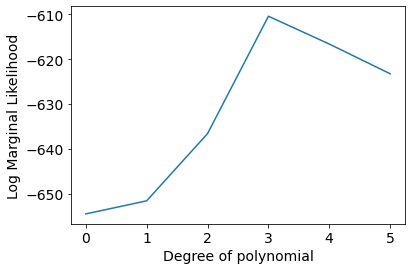

In [12]:
scores = [LogMarginalLikelihoodPdf(x_M, y) for x_M in [x_M0, x_M1, x_M2, x_M3, x_M4, x_M5]]
plt.plot(scores);
plt.xlabel('Degree of polynomial');
plt.ylabel('Log Marginal Likelihood');
plt.xticks(range(len(scores)));